In [146]:
import pandas as pd

# Read in the data
df = pd.read_csv('./eda_logs.csv')
df.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAdaGrad,2,tensorflow,False,NaN,losses_centralized,2.308897,NaN,0
1,FedAdaGrad,2,tensorflow,False,NaN,metrics_centralized,0.724577,NaN,0
2,FedAdaGrad,2,tensorflow,False,1.0,cpu_utilization_fit,59.300000,2023-11-30 17:26:49,1
3,FedAdaGrad,2,tensorflow,False,1.0,cpu_utilization_evaluate,52.400000,2023-11-30 17:27:55,1
4,FedAdaGrad,2,tensorflow,False,2.0,cpu_utilization_fit,59.600000,2023-11-30 17:26:49,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strategy      2724 non-null   object 
 1   n_clients     2724 non-null   int64  
 2   backend       2724 non-null   object 
 3   client_bool   2724 non-null   bool   
 4   client_num    1580 non-null   float64
 5   metric        2724 non-null   object 
 6   metric_value  2724 non-null   float64
 7   timestamp     2020 non-null   object 
 8   round         2724 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 173.0+ KB


In [148]:
#time to see the accuracies
df.metric.unique()

array(['losses_centralized', 'metrics_centralized', 'cpu_utilization_fit',
       'cpu_utilization_evaluate', 'losses_distributed',
       'fit_progress_loss', 'fit_progress_accuracy'], dtype=object)

In [149]:
#first grahp is seeing the cpu usage over time so we will keep rows that str.contains cpu_utilization in the metric column
df_cpu_util = df[df['metric'].str.contains('cpu_utilization')]
df_cpu_util.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
2,FedAdaGrad,2,tensorflow,False,1.0,cpu_utilization_fit,59.3,2023-11-30 17:26:49,1
3,FedAdaGrad,2,tensorflow,False,1.0,cpu_utilization_evaluate,52.4,2023-11-30 17:27:55,1
4,FedAdaGrad,2,tensorflow,False,2.0,cpu_utilization_fit,59.6,2023-11-30 17:26:49,1
5,FedAdaGrad,2,tensorflow,False,2.0,cpu_utilization_evaluate,51.6,2023-11-30 17:27:55,1
9,FedAdaGrad,2,tensorflow,False,1.0,cpu_utilization_fit,85.5,2023-11-30 17:29:34,2


In [150]:
strategies = df_cpu_util['strategy'].unique()
strategies.sort()
strategies = strategies[::-1]
n_clients = df_cpu_util['n_clients'].unique()
backends = df_cpu_util['backend'].unique()
metrics = df_cpu_util['metric'].unique()

# ['FedAdaGrad' 'FedAvg' 'FedAdam' 'FedAvgM']
# [5 2]
# ['jax' 'tensorflow' 'torch']
# ['cpu_utilization_fit' 'cpu_utilization_evaluate']
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(strategies)
print(n_clients)
print(backends)
print(metrics)

rounds = df_cpu_util['round'].unique()
print(rounds)



['FedAvgM' 'FedAvg' 'FedAdam' 'FedAdaGrad']
[2 5]
['tensorflow' 'torch' 'jax']
['cpu_utilization_fit' 'cpu_utilization_evaluate']
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#sort the dataframe by strategy, backend, metric, n_clients, round but strategy descending
df_cpu_util = df_cpu_util.sort_values(['strategy', 'backend', 'metric', 'n_clients', 'round'], ascending=[False, True, True, True, True])

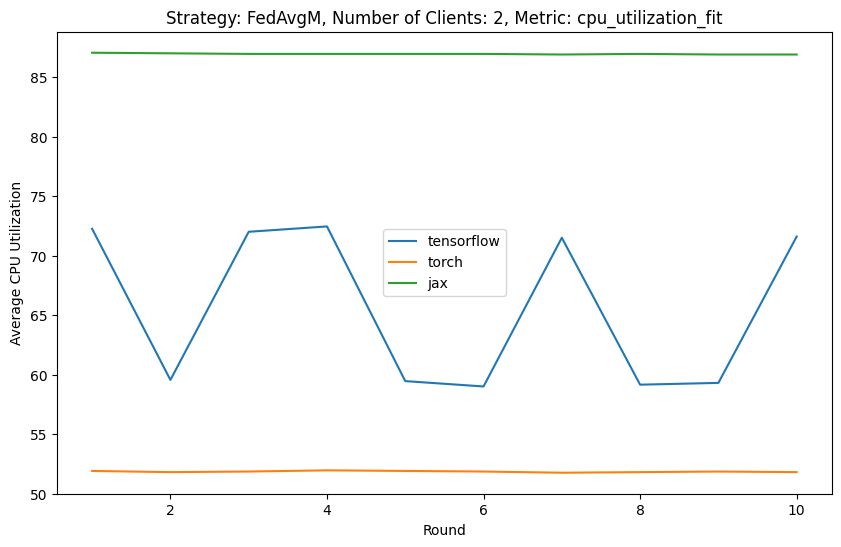

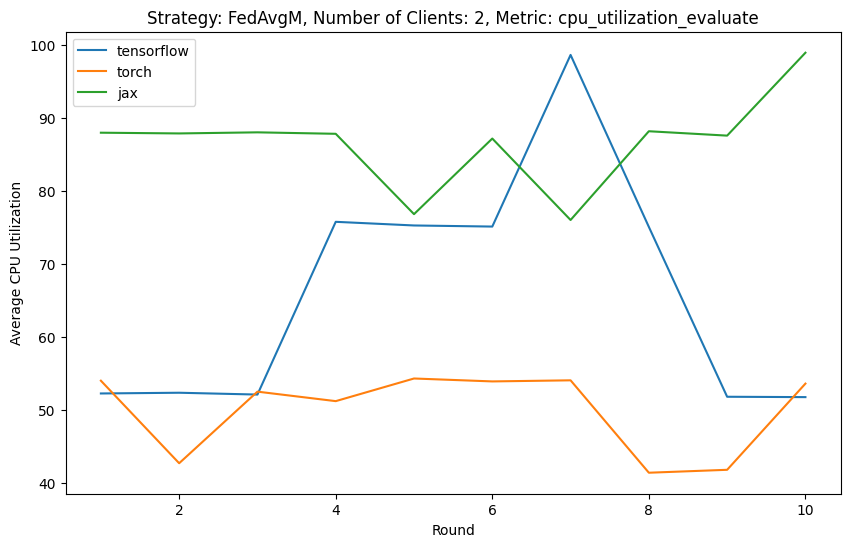

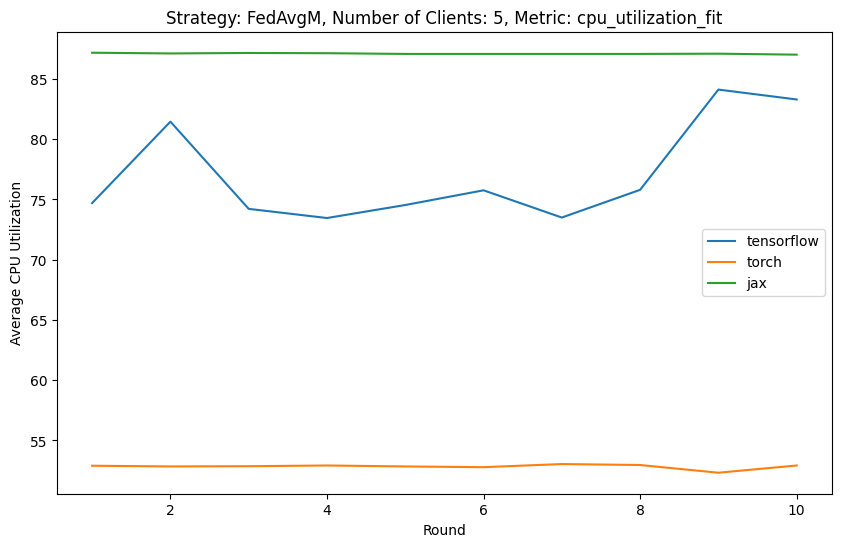

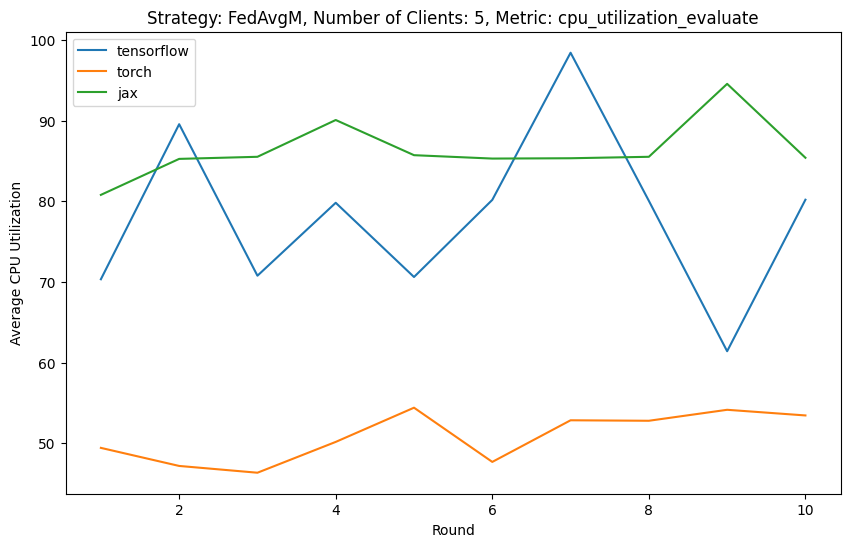

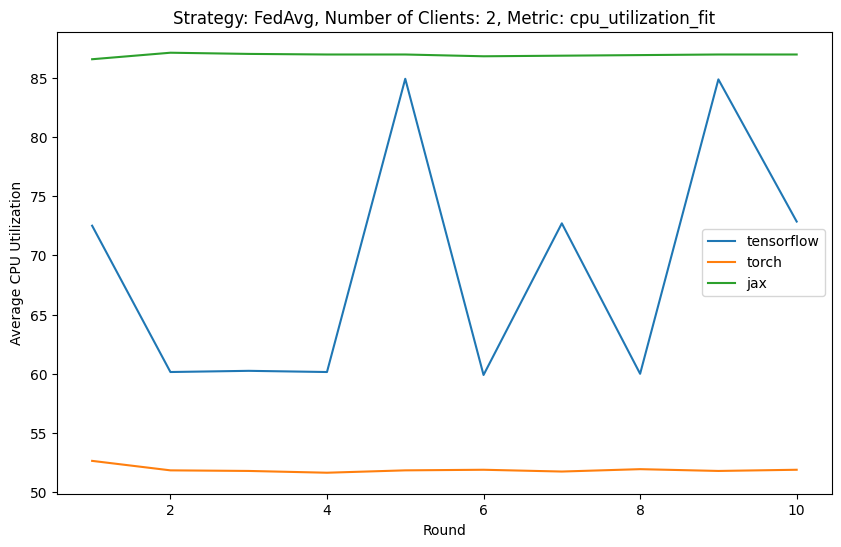

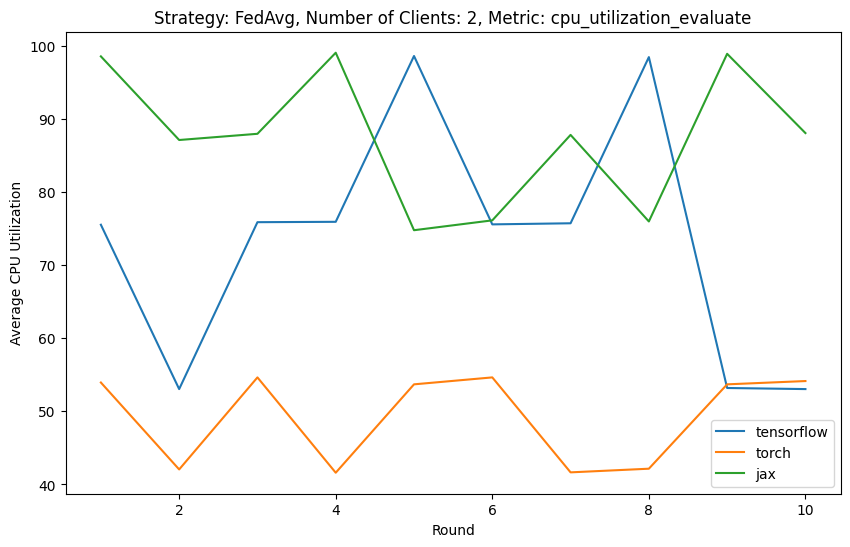

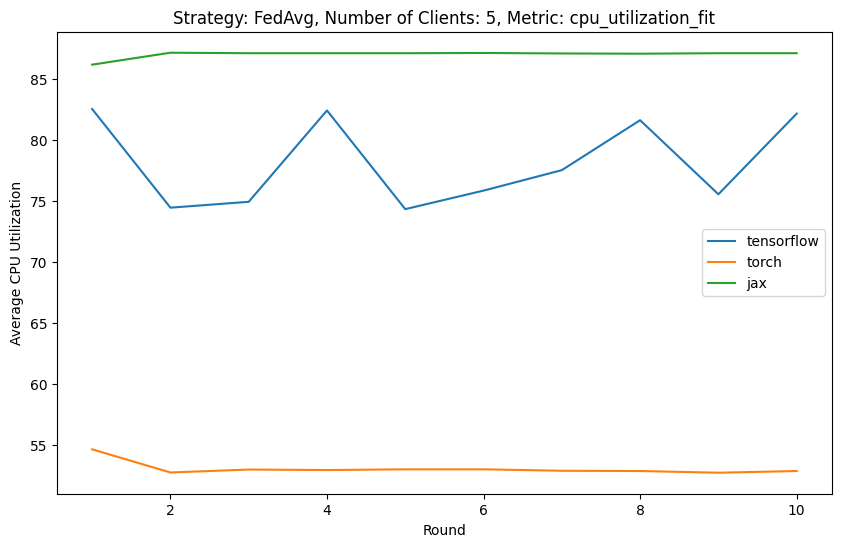

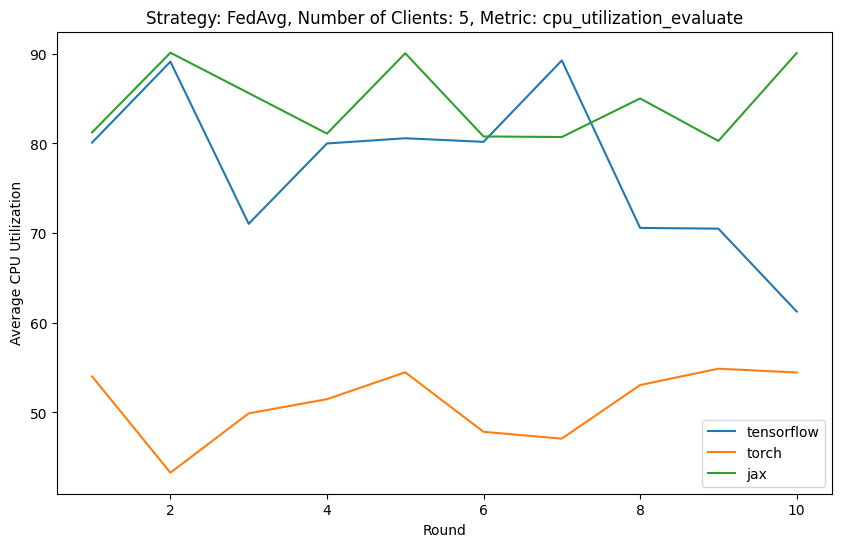

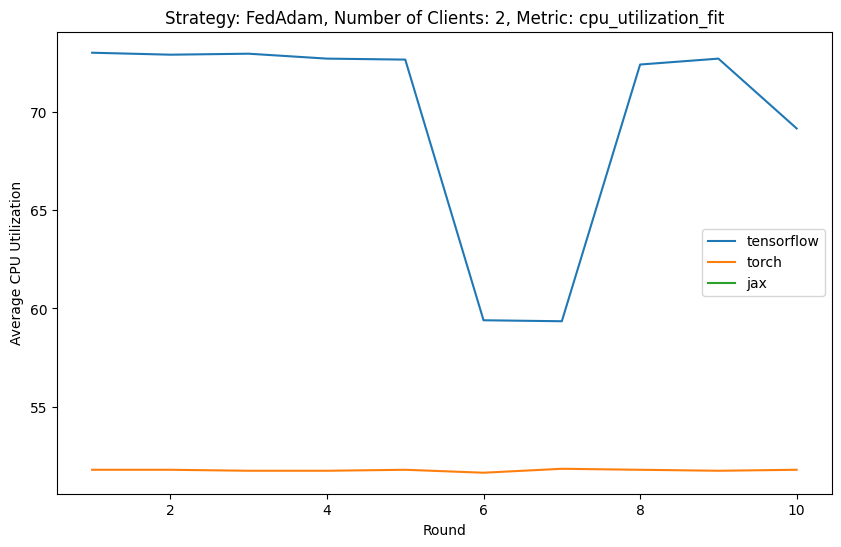

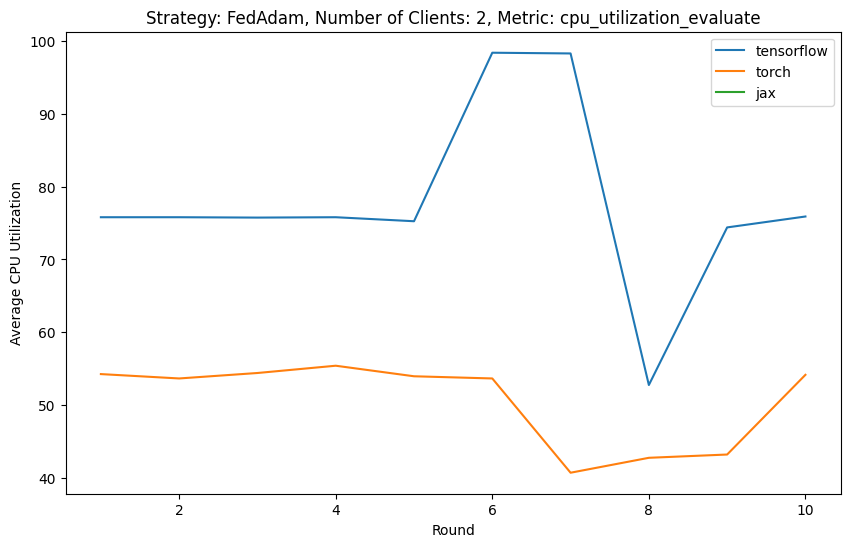

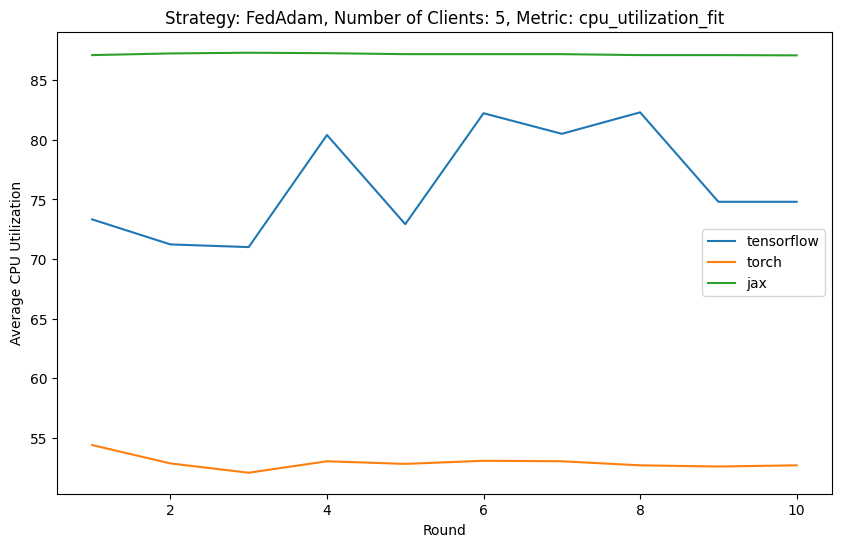

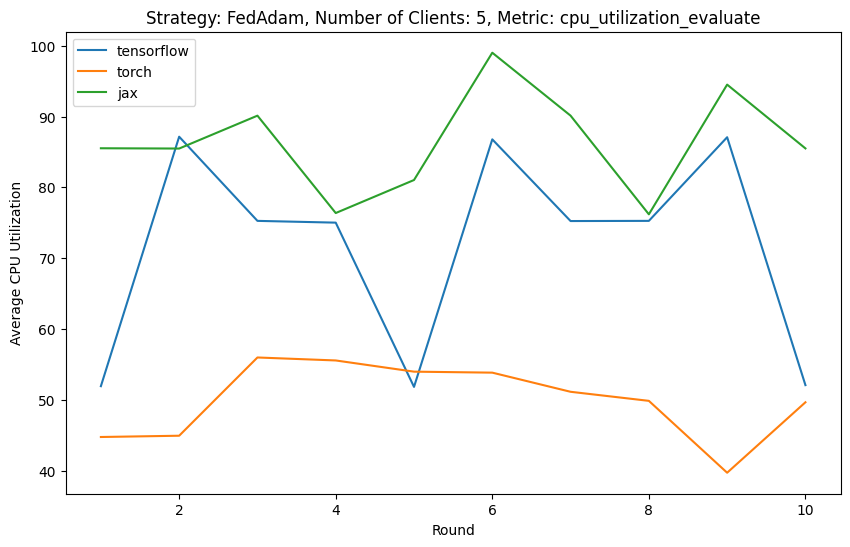

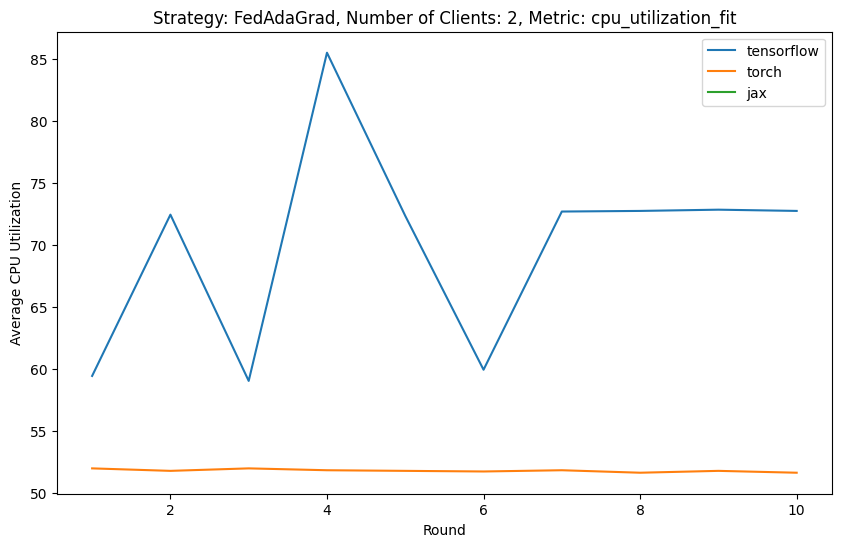

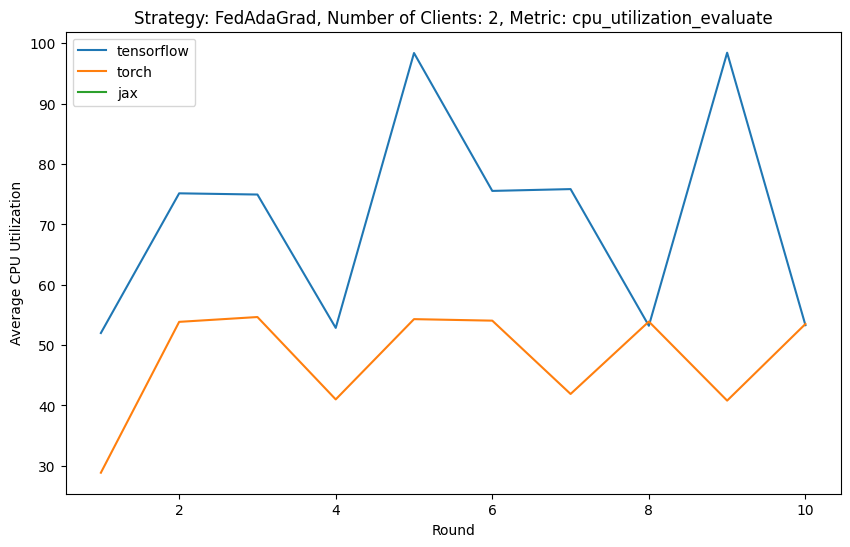

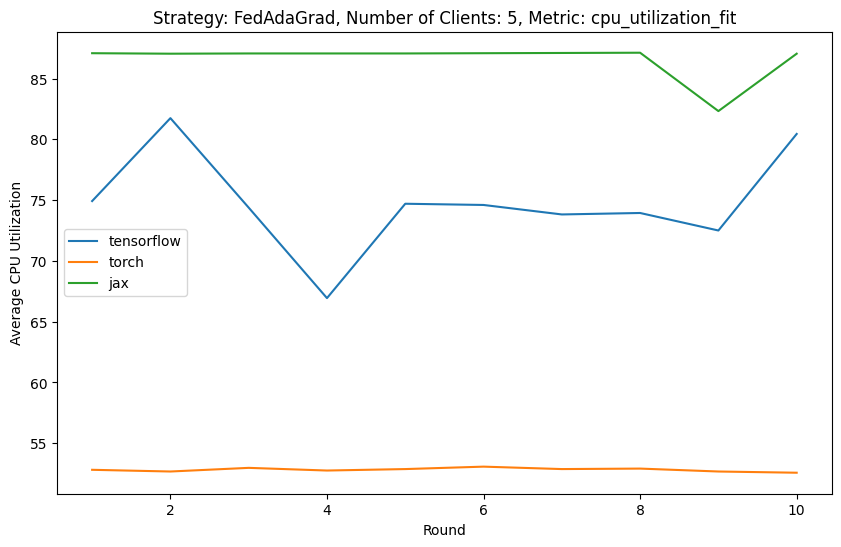

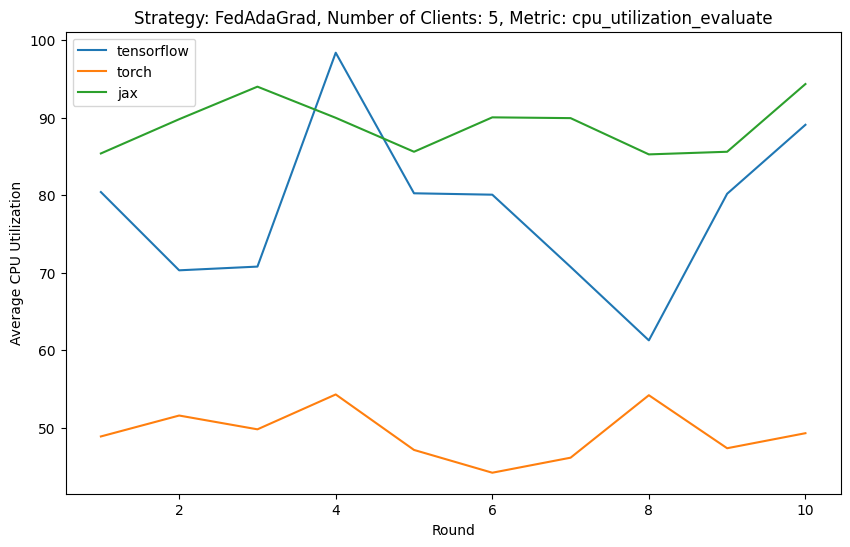

In [151]:
import matplotlib.pyplot as plt


# Iterate over each strategy, number of clients, and metric
for strategy in strategies:
    for client in n_clients:
        for metric in metrics:
            plt.figure(figsize=(10, 6)) 
            plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: {metric}')
            plt.xlabel('Round')
            plt.ylabel('Average CPU Utilization')

            # Plot for each backend
            for backend in backends:
                # Filter and group the DataFrame for the specific combination
                subset = df_cpu_util[(df_cpu_util['strategy'] == strategy) & 
                                     (df_cpu_util['n_clients'] == client) & 
                                     (df_cpu_util['backend'] == backend) & 
                                     (df_cpu_util['metric'] == metric)]
                
                # Group by round and calculate the mean
                mean_values = subset.groupby('round')['metric_value'].mean()

                # Check if there are enough rounds, if not, skip
                if mean_values.index.max() < max(rounds):
                    continue

                plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

            plt.legend()
            plt.show()

In [152]:
df_fit_progress = df[df['metric'].str.contains('fit_progress')]
df_fit_progress.head()


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
72,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,91569.992188,166.2297511380002,1
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,1
74,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.043661,2032.8621485920003,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,10
76,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,145.007767,374.1551054769998,2


In [153]:
import math
#reverse the rounds so that 10 is 1 and 1 is 10


In [154]:
acc = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_accuracy')]
acc['round'] = acc['round'].apply(lambda x: abs(11-x))
acc.head()

/tmp/ipykernel_9868/705814082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc['round'] = acc['round'].apply(lambda x: abs(11-x))


,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,1
77,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.671667,374.1551054769998,9
79,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.654006,582.4406952219997,8
81,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.639866,765.5931230429997,7


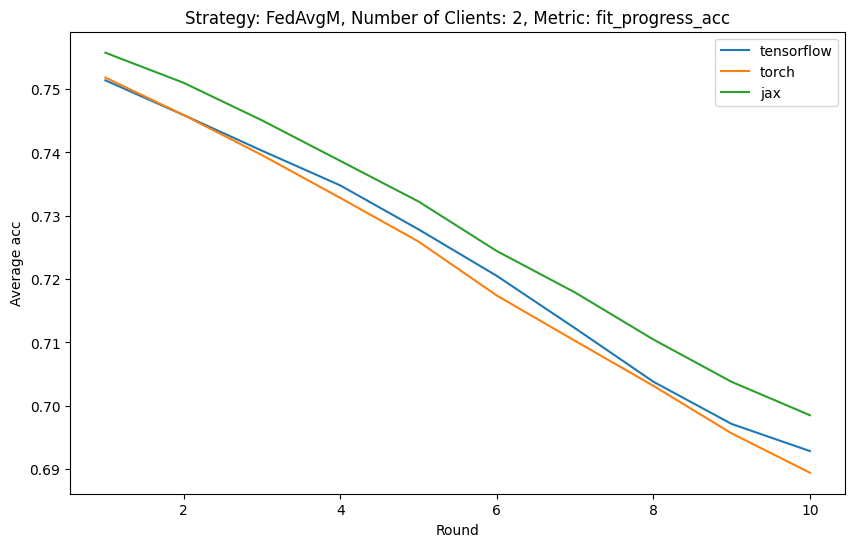

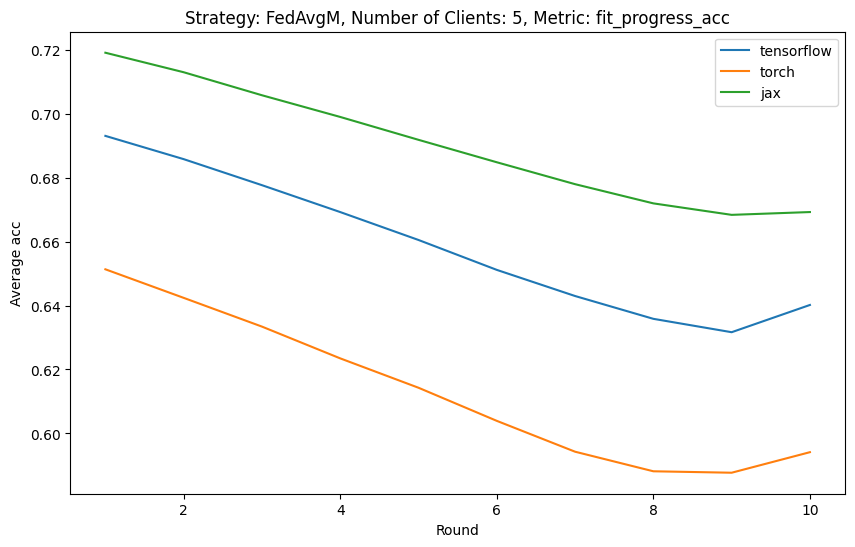

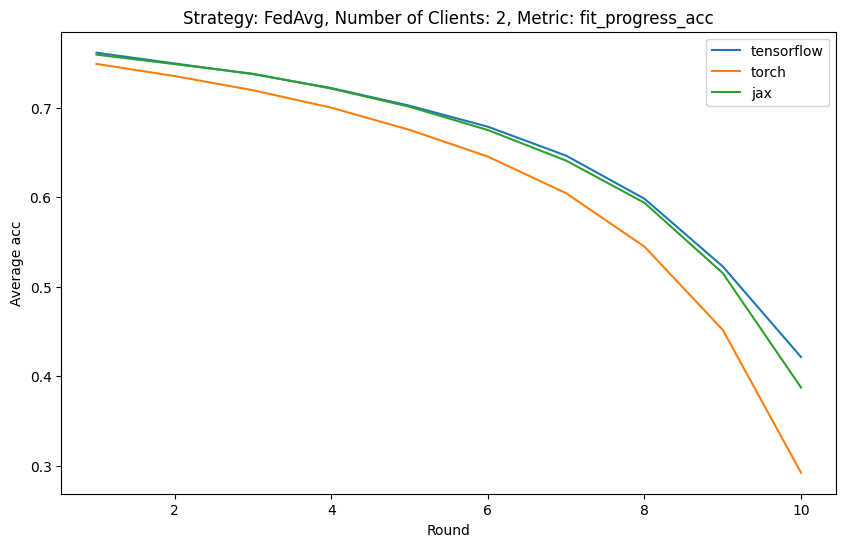

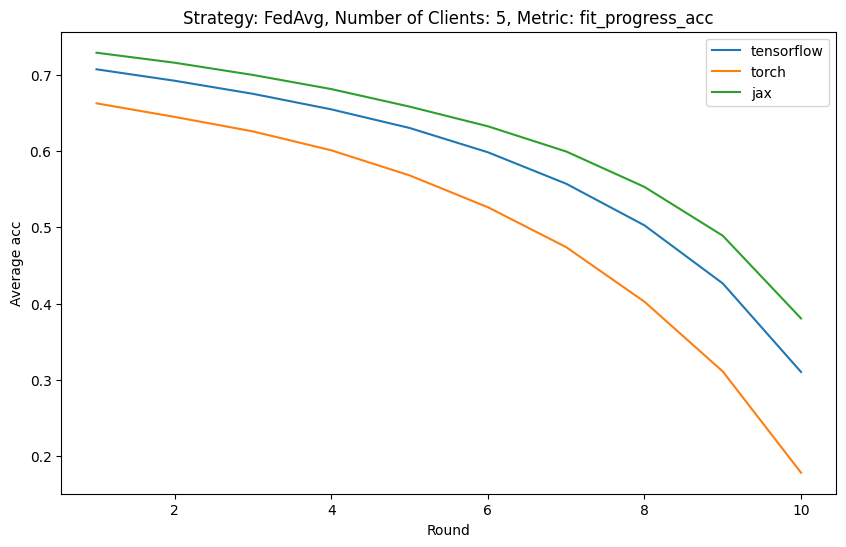

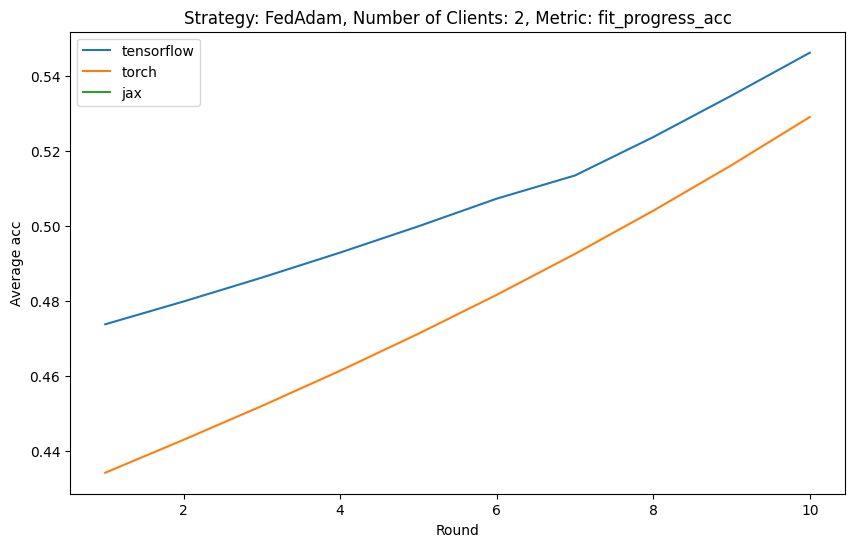

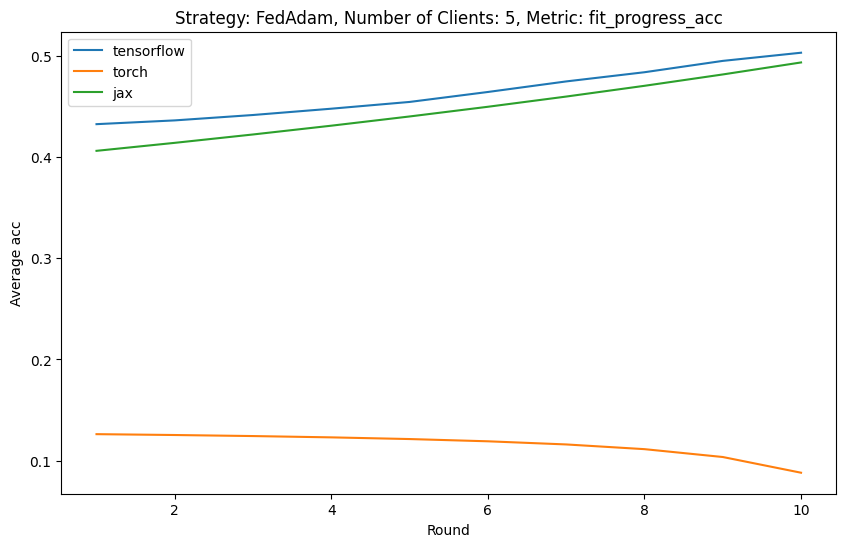

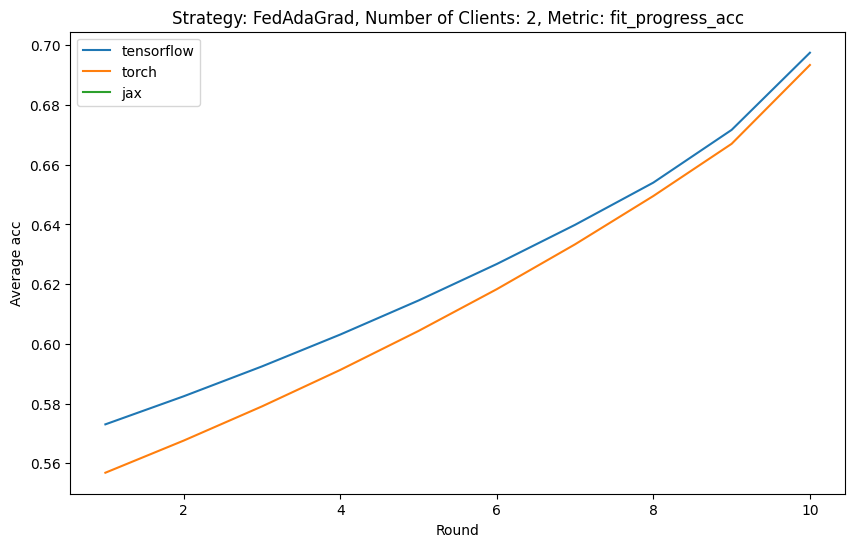

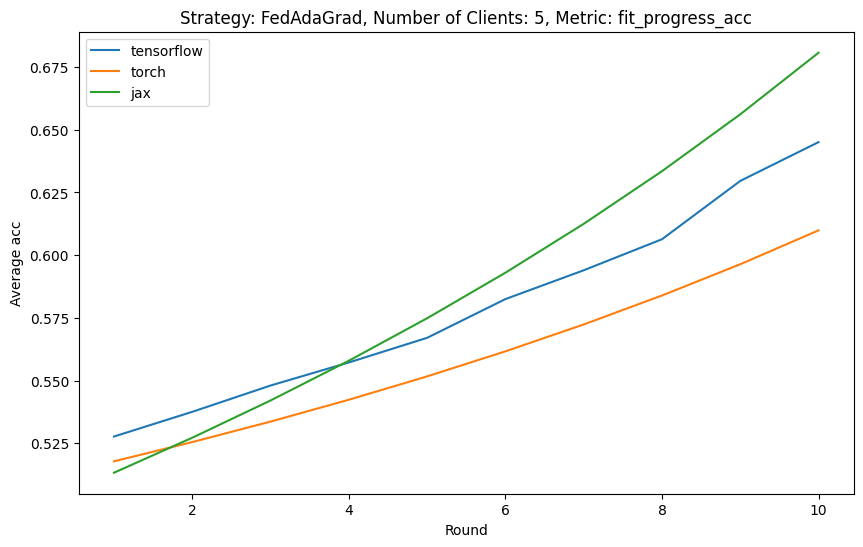

In [155]:
for strategy in strategies:
    for client in n_clients:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_acc')
        plt.xlabel('Round')
        plt.ylabel('Average acc')

        # Plot for each backend
        for backend in backends:
            # Filter and group the DataFrame for the specific combination
            subset = acc[(acc['strategy'] == strategy) & 
                            (acc['n_clients'] == client) & 
                            (acc['backend'] == backend)]
            
            # Group by round and calculate the mean
            mean_values = subset.groupby('round')['metric_value'].mean()

            # Check if there are enough rounds, if not, skip
            if mean_values.index.max() < max(rounds):
                continue

            plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

        plt.legend()
        plt.show()

In [156]:
#we need to  figure out the timing of the logs
df[df.client_bool == True].head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
72,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,91569.992188,166.2297511380002,1
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,1
74,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.043661,2032.8621485920003,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,10
76,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,145.007767,374.1551054769998,2


In [157]:
losses = df_fit_progress[df_fit_progress['metric'].str.contains('fit_progress_loss')]
losses.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
72,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,91569.992188,166.2297511380002,1
74,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.043661,2032.8621485920003,10
76,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,145.007767,374.1551054769998,2
78,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,127.175102,582.4406952219997,3
80,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_loss,2.228559,765.5931230429997,4


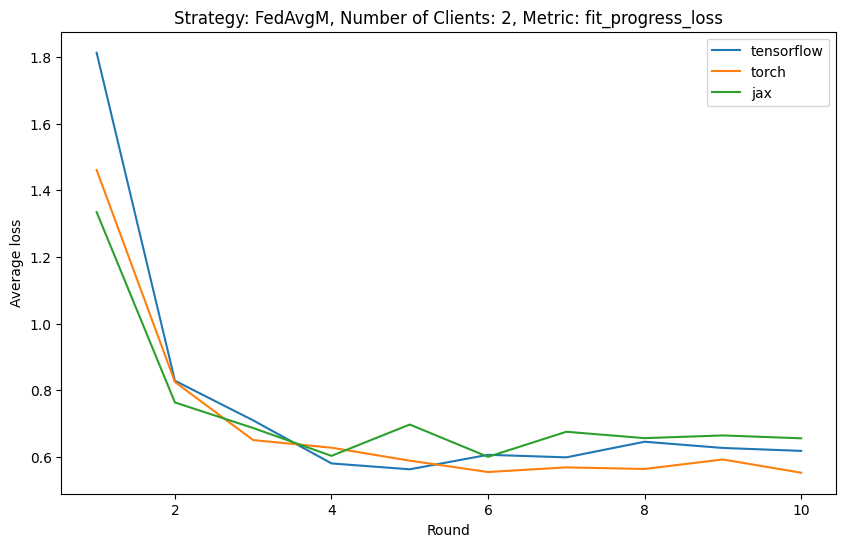

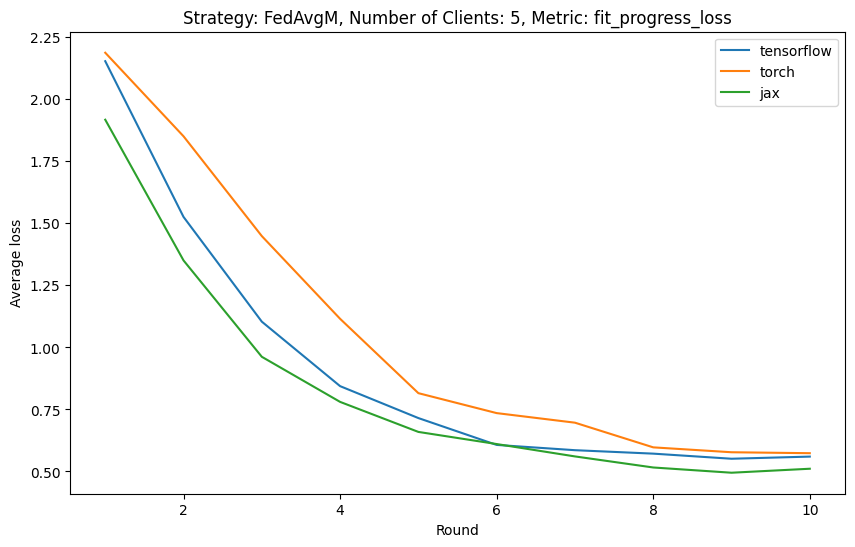

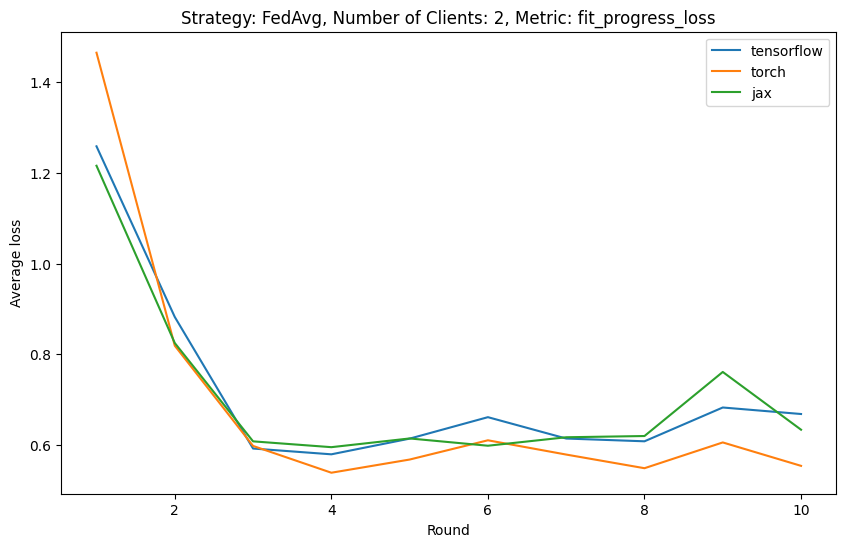

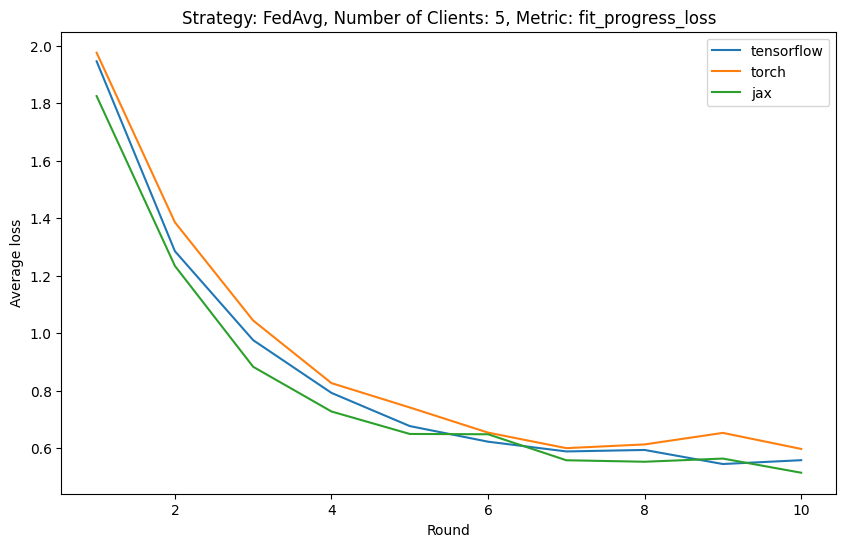

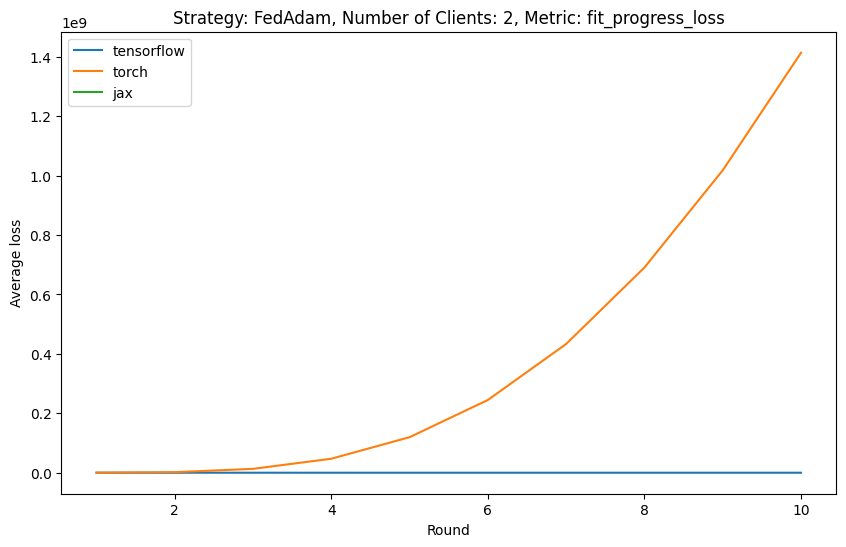

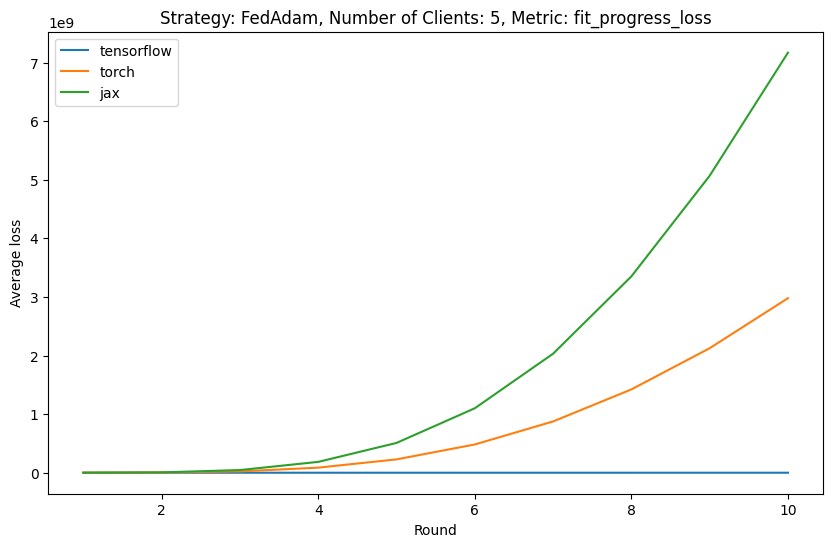

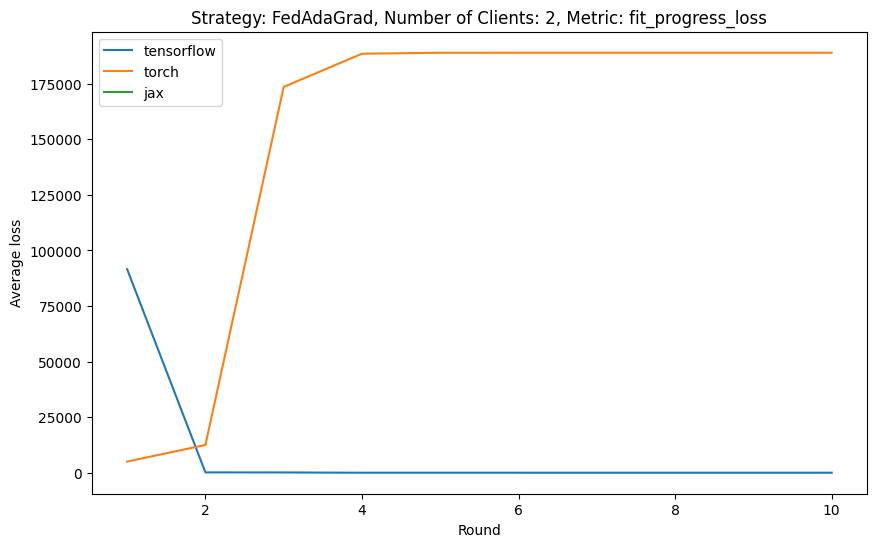

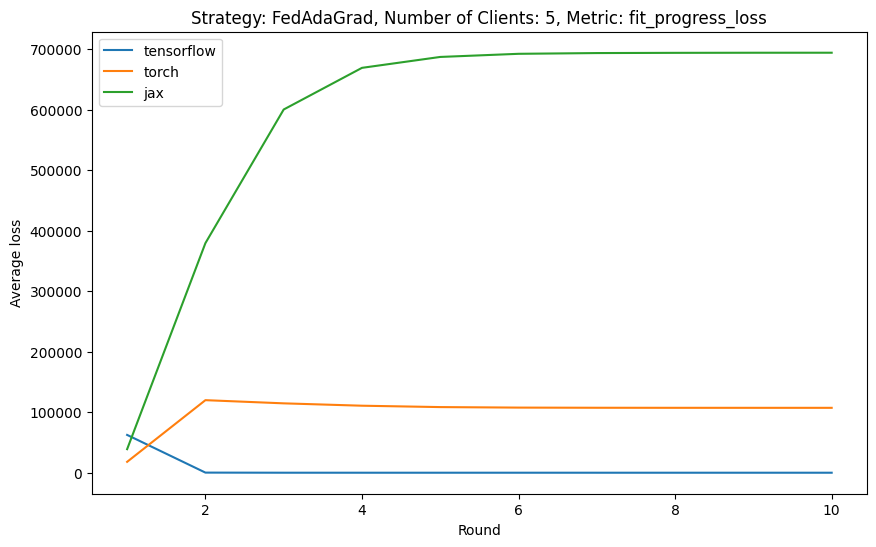

In [158]:
for strategy in strategies:
    for client in n_clients:
        plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
        plt.title(f'Strategy: {strategy}, Number of Clients: {client}, Metric: fit_progress_loss')
        plt.xlabel('Round')
        plt.ylabel('Average loss')

        # Plot for each backend
        for backend in backends:
            # Filter and group the DataFrame for the specific combination
            subset = losses[(losses['strategy'] == strategy) & 
                            (losses['n_clients'] == client) & 
                            (losses['backend'] == backend)]
            
            # Group by round and calculate the mean
            mean_values = subset.groupby('round')['metric_value'].mean()

            # Check if there are enough rounds, if not, skip
            if mean_values.index.max() < max(rounds):
                continue

            plt.plot(mean_values.index, mean_values.values, label=f'{backend}')

        plt.legend()
        plt.show()

In [159]:
#Now we need to use the accuracy rows but instead calculate the differnect from the timestamps to see how long it took to get to that accuracy
acc.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
73,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.697512,166.2297511380002,10
75,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.573022,2032.8621485920003,1
77,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.671667,374.1551054769998,9
79,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.654006,582.4406952219997,8
81,FedAdaGrad,2,tensorflow,True,NaN,fit_progress_accuracy,0.639866,765.5931230429997,7
